- Neural nets in nlp are a substitute of naive bayes or statistics/heuristics based approaches for every nlp problem of those days.
- Be it text classification, auto complete prediction, or sentiment analysis or positive/negative text, the vectorized form of data could be fed and let the neural net take care of extracting relationships or understand data so that it can model the solution for problem.
- In this regard, the vectors could be optimized by using n-grams to increase contextual references and embedding layers that could be used to reduce dimensionality (like you would use pca in ML) of final vector before feeding to neural networks.
- n-grams: useful for capturing local context
- Embeddings: useful for reducing dimensionality and encoding semantics.
- While PCA reduces dimensionality linearly, embeddings are learned — they reduce dimensionality and preserve semantic relationships in a task-aware manner.
- Now RNN is an architecture of passing on hidden states along with input to increase efficiency of process. RNNs enhance modeling by maintaining a hidden state — memory of prior inputs — allowing them to model dependencies across time steps, which is crucial in NLP where word order matters.
- Bi-directional RNN is a further approach to increae efficiency further. Bi-directional RNNs process the input in both forward and backward directions, helping the model understand context from both past and future tokens — which is valuable when the entire sequence is available.
- nlike traditional feedforward networks, RNNs have a memory of previous computations, which makes them perfect for tasks like:
  - Text processing (sentiment analysis, translation)
  - Time-series prediction (stock prices, sensor data)
  - Speech and audio processing

- Suppose you have a sentence: "I love NLP"
- Let’s say each word is converted into a vector (e.g., via embeddings):
  - x1 = "I"
  - x2 = "love"
  - x3 = "NLP"
- Then the RNN processes it step-by-step:
  - h0 = initial hidden state (usually zeros)
  - h1 = f(Wx * x1 + Wh * h0 + b)
  - h2 = f(Wx * x2 + Wh * h1 + b)
  - h3 = f(Wx * x3 + Wh * h2 + b)
- Where: Wx is weight for current input, Wh is weight for previous hidden state, f is an activation function (like tanh or ReLU), h_t is hidden state at time t



| Component      | Description                                                            |
| -------------- | ---------------------------------------------------------------------- |
| Input Sequence | A sequence of inputs (e.g., words, time steps) fed one at a time       |
| Hidden State   | Internal memory that captures past input information                   |
| Output         | Can be generated at each step or only at the last step                 |
| Weights        | Shared across time steps (`Wx`, `Wh`, and bias `b`)                    |
| Activation     | Usually **tanh** or **ReLU**, sigmoid for gating functions in LSTM/GRU |

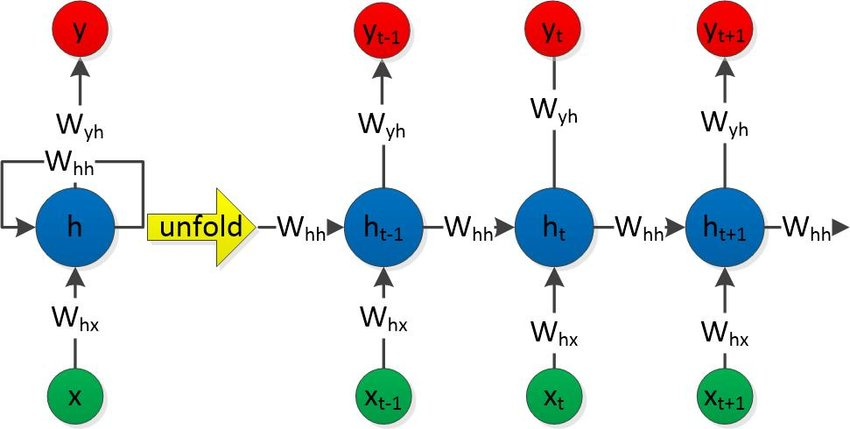

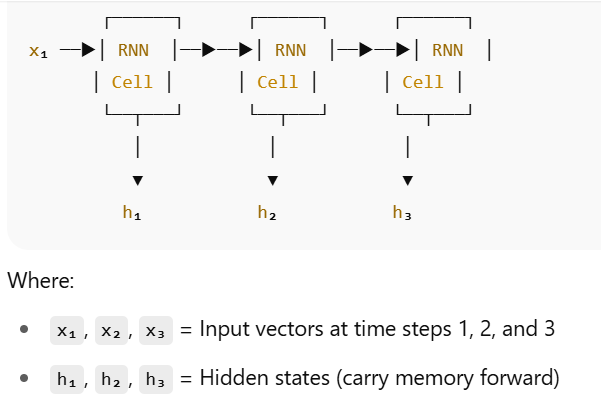
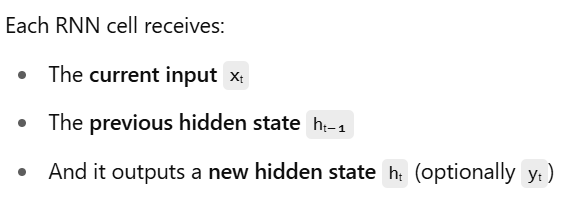
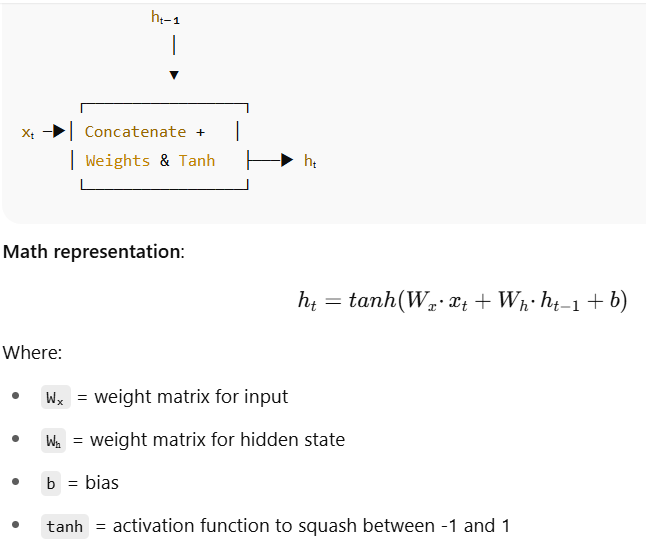
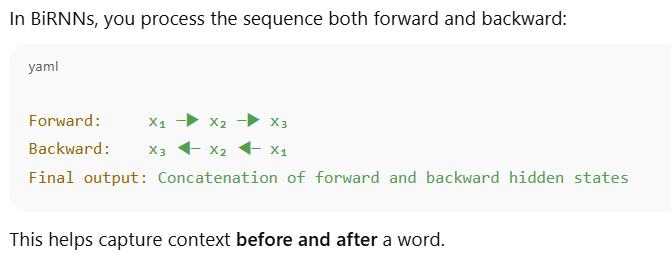

## Types of RNNs
| Type                   | Example Use-Case     | Description                            |
| ---------------------- | -------------------- | -------------------------------------- |
| 1. One-to-One          | Image classification | Vanilla neural network                 |
| 2. One-to-Many         | Image captioning     | Single input, sequence output          |
| 3. Many-to-One         | Sentiment analysis   | Sequence input, single output          |
| 4. Many-to-Many (same) | POS tagging, NER     | Sequence in → same length sequence out |
| 5. Many-to-Many (diff) | Machine translation  | Input and output sequences differ      |


RNNs are often characterized by one-to-one architecture: one input sequence is associated with one output. However, you can flexibly adjust them into various configurations for specific purposes. The following are several common RNN types.

#### One-to-many:
This RNN type channels one input to several outputs. It enables linguistic applications like image captioning by generating a sentence from a single keyword.

#### Many-to-many:
The model uses multiple inputs to predict multiple outputs. For example, you can create a language translator with an RNN, which analyzes a sentence and correctly structures the words in a different language.

#### Many-to-one:
Several inputs are mapped to an output. This is helpful in applications like sentiment analysis, where the model predicts customers’ sentiments like positive, negative, and neutral from input testimonials.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}
seq_length = 3
sequences = []
labels = []
print(chars)

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])

X = np.array(sequences)
y = np.array(labels)
print(X,y)

[' ', 'G', 'T', 'a', 'e', 'f', 'g', 'h', 'i', 'k', 'n', 'o', 'r', 's', 't', 'u', 'w']
[[ 2  7  8]
 [ 7  8 13]
 [ 8 13  0]
 [13  0  8]
 [ 0  8 13]
 [ 8 13  0]
 [13  0  1]
 [ 0  1  4]
 [ 1  4  4]
 [ 4  4  9]
 [ 4  9 13]
 [ 9 13  5]
 [13  5 11]
 [ 5 11 12]
 [11 12  1]
 [12  1  4]
 [ 1  4  4]
 [ 4  4  9]
 [ 4  9 13]
 [ 9 13  0]
 [13  0  3]
 [ 0  3  0]
 [ 3  0 13]
 [ 0 13 11]
 [13 11  5]
 [11  5 14]
 [ 5 14 16]
 [14 16  3]
 [16  3 12]
 [ 3 12  4]
 [12  4  0]
 [ 4  0 14]
 [ 0 14 12]
 [14 12  3]
 [12  3  8]
 [ 3  8 10]
 [ 8 10  8]
 [10  8 10]
 [ 8 10  6]
 [10  6  0]
 [ 6  0  8]
 [ 0  8 10]
 [ 8 10 13]
 [10 13 14]
 [13 14  8]
 [14  8 14]
 [ 8 14 15]
 [14 15 14]] [13  0  8 13  0  1  4  4  9 13  5 11 12  1  4  4  9 13  0  3  0 13 11  5
 14 16  3 12  4  0 14 12  3  8 10  8 10  6  0  8 10 13 14  8 14 15 14  4]


In [ ]:
X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))
#print(X_one_hot, y_one_hot)

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0764 - loss: 2.8206
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0764 - loss: 2.7987
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1250 - loss: 2.7633
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1285 - loss: 2.7539
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1389 - loss: 2.7375
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1632 - loss: 2.7076
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1736 - loss: 2.6817
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1562 - loss: 2.6813
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2222 - loss: 2.6413
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1910 - loss: 2.6305
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2153 - loss: 2.6208
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2604 - loss: 2.5777 


In [ ]:
start_seq = "This is G"
generated_text = start_seq

for i in range(20):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Generated Text:
This is Geeks a software trai


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
with open('/content/drive/MyDrive/Colab Notebooks/reviews.txt', 'r') as f:
    reviews = f.read()
with open('/content/drive/MyDrive/Colab Notebooks/labels.txt', 'r') as f:
    labels = f.read()

In [ ]:
#reviews
#reviews.split('\n')
#type(reviews.split('\n'))
reviews.split('\n')[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [ ]:
#labels.split('\n')
type(labels.split('\n')), labels.split('\n')[0]

(list, 'positive')

In [ ]:
"""Preprocessing

1. convert the data into lower case
2. Remove the punctuation
3. Tokenization
4. Remove the stop words
5. Vocabulry
6. Vectors
7. Building the model
"""
from string import punctuation
reviews_split = reviews.split('\n')
reviews_list = []
for each_review in reviews_split:
  reviews_list.append(''.join([i for i in each_review if i not in punctuation]))   #Cleaned data


# reviews_split is a list of sentences
# Let's iterate through each sentence and split into individual words
words = []
for sen in  reviews_split:
  for word in sen.split():
    words.append(word)

unique_words = set(words)  #Deduplication
print(len(unique_words), len(words))

74073 6347388


In [ ]:
from collections import Counter
counts = dict(Counter(words))
list(counts.items())[0:10]

[('bromwell', 8),
 ('high', 2161),
 ('is', 107328),
 ('a', 163009),
 ('cartoon', 545),
 ('comedy', 3246),
 ('.', 327192),
 ('it', 96352),
 ('ran', 238),
 ('at', 23513)]

In [ ]:
sorted_dict = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
myvocab = list(sorted_dict.items())
myvocab[0:10]

[('the', 336713),
 ('.', 327192),
 ('and', 164107),
 ('a', 163009),
 ('of', 145864),
 ('to', 135720),
 ('is', 107328),
 ('br', 101872),
 ('it', 96352),
 ('in', 93968)]

In [ ]:
# Create your dictionary that maps vocab words to integers here
vocab_to_int = {word: i for i, word in enumerate(vocab, 1)} # start from 1
#vocab_to_int
#list(dict(vocab_to_int).items())[0:10]

In [ ]:
#reviews
len(reviews_split), len(reviews_list)

(25001, 25001)

In [ ]:
# Convert the reviews to integers, same shape as reviews list, but with integers
review_ints = []
for each in reviews_list:
   review_ints.append([vocab_to_int[word] for word in each.split()])
print(review_ints[0])
print(type(review_ints))
print(len(review_ints))
print(type(review_ints[0]))
print(len(review_ints[0]))

[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23]
<class 'list'>
25001
<class 'list'>
140


In [ ]:
print(len(review_ints[1]))
print(len(review_ints[2]))

114
447


In [ ]:
import numpy as np
labels = labels.split('\n')
labels = [1 if label == 'positive' else 0 for label in labels]   #Manual encoding of target
labels = np.array(labels)

print(len(review_ints))
print(len(labels))


25001
25001


In [ ]:
len_of_list = []
for lst in review_ints:
  len_of_list.append(len(lst))
print(len_of_list)
print(max(len_of_list))

[140, 114, 447, 786, 150, 146, 124, 153, 121, 401, 184, 104, 112, 331, 346, 159, 451, 68, 330, 295, 290, 347, 86, 148, 283, 105, 231, 144, 148, 180, 162, 140, 196, 67, 333, 87, 132, 134, 155, 181, 219, 20, 581, 541, 177, 187, 186, 178, 144, 121, 106, 860, 109, 227, 317, 198, 150, 508, 145, 243, 246, 127, 122, 331, 166, 315, 168, 156, 451, 519, 412, 346, 56, 238, 305, 157, 221, 254, 338, 118, 359, 196, 167, 118, 551, 117, 248, 233, 111, 353, 337, 262, 991, 729, 566, 220, 89, 398, 1853, 116, 460, 132, 549, 157, 185, 166, 553, 697, 207, 187, 736, 249, 185, 174, 163, 197, 57, 197, 280, 171, 98, 164, 184, 355, 134, 194, 223, 994, 327, 137, 168, 174, 110, 161, 225, 115, 111, 140, 96, 210, 126, 138, 196, 143, 297, 54, 328, 146, 43, 1037, 149, 166, 109, 345, 339, 461, 76, 145, 230, 325, 119, 252, 262, 367, 117, 54, 117, 195, 55, 308, 57, 420, 275, 134, 129, 545, 182, 222, 164, 136, 256, 129, 78, 171, 204, 97, 120, 223, 169, 105, 56, 56, 64, 93, 102, 177, 139, 715, 161, 135, 177, 155, 219, 129,

Let's truncate to 400 steps. For reviews shorter than 400, we'll pad with 0s. For reviews longer than 400, we can truncate them to the first 400 characters.

Now, create an array features that contains the data we'll pass to the network. The data should come from review_ints, since we want to feed integers to the network. Each row should be 200 elements long. For reviews shorter than 200 words, left pad with 0s. That is, if the review is ['best', 'movie', 'ever'], [117, 18, 128] as integers, the row will look like [0, 0, 0, ..., 0, 117, 18, 128]. For reviews longer than 200, use on the first 200 words as the feature vector.

This isn't trivial and there are a bunch of ways to do this. But, if you're going to be building your own deep learning networks, you're going to have to get used to preparing your data.

In [ ]:
#Each review truncating or just padding
seq_len = 400
features = []
for review in review_ints:# 1st reviw
    review_len = len(review) # 114
    len_diff = seq_len - review_len # 400 - 114 = 286
    if len_diff <= 0:
        features.append(review[:seq_len])  #Truncating

    else:
        padding = [0] * len_diff     # [0] * 286 = 286 [0]   #Creating padding sequence
        padded_feature = padding + review # 286[0] + 114     #Padding
        features.append(padded_feature) # 400

features = np.asarray(features)

In [ ]:
print(len(features))
print(len(features[0]))
print(len(features[1]))
print(len(features[2]))
print(features.shape)
print(labels.shape)

25001
400
400
400
(25001, 400)
(25001,)


With our data in nice shape, we'll split it into training, validation, and test sets.

Create the training, validation, and test sets here. You'll need to create sets for the features and the labels, train_x and train_y for example. Define a split fraction, split_frac as the fraction of data to keep in the training set. Usually this is set to 0.8 or 0.9. The rest of the data will be split in half to create the validation and testing data.

In [ ]:
split_frac = 0.8
split_idx = int(len(features) * split_frac)

train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(val_x) * 0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{},{}".format(train_x.shape,train_y.shape),
      "\nValidation set: \t{},{}".format(val_x.shape,val_y.shape),
      "\nTest set: \t\t{},{}".format(test_x.shape,test_y.shape))

			Feature Shapes:
Train set: 		(20000, 400),(20000,) 
Validation set: 	(2500, 400),(2500,) 
Test set: 		(2501, 400),(2501,)


In [ ]:
# Build a simple RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
model = Sequential()
model.add(SimpleRNN(50, input_shape = (400,1), return_sequences = True))
model.add(SimpleRNN(50,return_sequences = True))
model.add(SimpleRNN(50))
model.add(Dense(50))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model.fit(train_x, train_y, epochs = 1, batch_size = 50, verbose = 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 400, 50)        │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 400, 50)        │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_12 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,301 (59.77 KB)

 Trainable params: 15,301 (59.77 KB)

 Non-trainable params: 0 (0.00 B)

None
400/400 ━━━━━━━━━━━━━━━━━━━━ 114s 269ms/step - accuracy: 0.5111 - loss: 0.6997


In [ ]:
loss, accuracy = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {accuracy:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.4951 - loss: 0.7052
Test Accuracy: 0.4990


In [ ]:
#Testing
import string
def clean_text(text):
    # Remove punctuation and lowercase
    return ''.join([ch for ch in text if ch not in string.punctuation]).lower()

def encode_review(review, vocab_to_int, seq_len=400):
    cleaned = clean_text(review)
    encoded = [vocab_to_int.get(word, 0) for word in cleaned.split()]  # Use 0 for unknown words
    if len(encoded) < seq_len:
        encoded = [0] * (seq_len - len(encoded)) + encoded
    else:
        encoded = encoded[:seq_len]
    return np.array(encoded)

def predict_sentiment(review, model, vocab_to_int):
    encoded = encode_review(review, vocab_to_int)
    encoded = encoded.reshape(1, 400, 1)
    prediction = model.predict(encoded)
    pred_prob = prediction[0][0]
    pred_class = 1 if pred_prob >= 0.5 else 0
    print("Prediction:", prediction)
    print("Predicted Class:", pred_class)
    if pred_class == 1:
        print("Sentiment: Positive")
    else:
        print("Sentiment: Negative")

# === Example ===
new_review = "This movie was absolutely wonderful and touching"
predict_sentiment(new_review, model, vocab_to_int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Prediction: [[0.43063352]]
Predicted Class: 0
Sentiment: Negative


In [ ]:
from tensorflow.keras.layers import Bidirectional

# Build a Bidirectional RNN model
model_bi = Sequential()
model_bi.add(Bidirectional(SimpleRNN(50, return_sequences=True), input_shape=(400, 1)))
model_bi.add(Bidirectional(SimpleRNN(50, return_sequences=True)))
model_bi.add(Bidirectional(SimpleRNN(50)))
model_bi.add(Dense(50))
model_bi.add(Dense(1))
model_bi.add(Activation('sigmoid'))

print(model_bi.summary())

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bi.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Assuming train_x, train_y, test_x, test_y are already defined from the preceding code
# Reshape train_x and test_x to include the feature dimension (it's currently missing)
train_x = np.expand_dims(train_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
val_x = np.expand_dims(val_x, axis=-1)

model_bi.fit(train_x, train_y, epochs=1, batch_size=50, verbose=1)

loss, accuracy = model_bi.evaluate(test_x, test_y)
print(f"Test Accuracy with Bidirectional RNN: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 400, 100)       │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 400, 100)       │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,501 (158.21 KB)

 Trainable params: 40,501 (158.21 KB)

 Non-trainable params: 0 (0.00 B)

None
400/400 ━━━━━━━━━━━━━━━━━━━━ 259s 623ms/step - accuracy: 0.5030 - loss: 0.7259
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.5050 - loss: 0.7094
Test Accuracy with Bidirectional RNN: 0.5050


In [ ]:
#Testing
def predict_sentiment_bi(review, model, vocab_to_int):
    encoded = encode_review(review, vocab_to_int)
    encoded = encoded.reshape(1, 400, 1) # Reshape for the model input
    prediction = model.predict(encoded)
    print("Prediction:", prediction)
    # For binary classification with sigmoid output, prediction is a single value between 0 and 1
    # We can threshold it at 0.5 to get the class
    predicted_class = 1 if prediction > 0.5 else 0
    print("Predicted Class:", predicted_class)
    if predicted_class == 1:
        print("Sentiment: Positive")
    else:
        print("Sentiment: Negative")

# === Example with Bidirectional RNN ===
new_review = "This movie was absolutely wonderful and touching"
print("\nPredicting with Bidirectional RNN:")
predict_sentiment_bi(new_review, model_bi, vocab_to_int)

new_review_negative = "This movie was terrible, the worst I have ever seen"
print("\nPredicting with Bidirectional RNN:")
predict_sentiment_bi(new_review_negative, model_bi, vocab_to_int)


Predicting with Bidirectional RNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
Prediction: [[0.5687767]]
Predicted Class: 1
Sentiment: Positive

Predicting with Bidirectional RNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction: [[0.54193646]]
Predicted Class: 1
Sentiment: Positive
